#Introdução

Grupo: Germano Barcelos (3873), Guilherme Melos (3882), Jhonata Miranda (3859)

O reconhecimento de rostos é amplamente utilizado hoje em dia para segurança, reconhecimento facial em diversos dispositivos, processamento de imagens de pessoas, entre outras aplicações. Utilizando um algoritmo conhecido como Haar Cascade, iremos reconhecer em um vídeo alguns personagens conhecidos, com a obtenção das chamadas características de Haar. 

#Haar Cascade

Um classificador Haar, ou classificador em Haar cascade, é um programa de detecção de objectos de aprendizagem de máquina que identifica objectos numa imagem e num vídeo. 

O algoritmo pode ser explicado em quatro fases:

1.   Cálculo das características de Haar
2.   Criação de imagens integrais
3.   Usando o Adaboost
4.   Implementar classificadores em cascata

É importante lembrar que este algoritmo requer muitas imagens positivas de rostos e imagens negativas de não-faces para treinar o classificador, à semelhança de outros modelos de aprendizagem de máquinas.

##Cálculo das características de Haar

O primeiro passo é recolher as características de Haar. Uma característica Haar é essencialmente cálculos que são efectuados em regiões retangulares adjacentes, num local específico, numa janela de detecção. O cálculo implica somar as intensidades de píxeis em cada região e calcular as diferenças entre as somas. Seguem-se alguns exemplos de características de Haar.

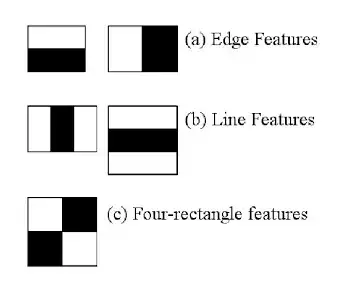

Estas características podem ser difíceis de determinar para uma imagem grande. É aqui que entram em jogo as imagens integrais porque o número de operações é reduzido utilizando a imagem integral.

##Criando imagens integrais

As imagens integrais aceleram essencialmente o cálculo destas características Haar. Em vez de computar em cada pixel, cria sub-retângulos e referências de matriz para cada um desses sub-retângulos. Estes são então utilizados para calcular as características de Haar.

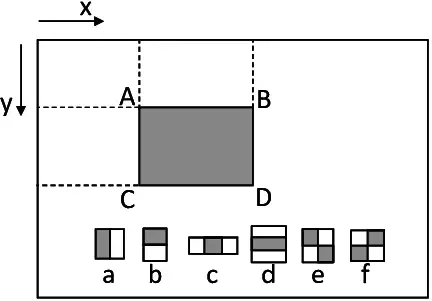

É importante notar que quase todas as características de Haar serão irrelevantes na detecção de objetos, porque as únicas características que são importantes são as do objeto. 

##Treinando Adaboost

O Adaboost escolhe essencialmente as melhores características e forma os classificadores para as utilizar. Utiliza uma combinação de "classificadores fracos" para criar um "classificador forte" que o algoritmo pode utilizar para detectar objectos.

Os classificadores fracos são criados movendo uma janela sobre a imagem de entrada, e calculando as características Haar para cada subseção da imagem. Esta diferença é comparada com um limiar de aprendizagem que separa os não-objetos dos objetos. Como estes são "classificadores fracos", é necessário um grande número de características de Haar para que a precisão constitua um classificador forte. A ultima etapa combina estes classificadores fracos com classificadores fortes usando classicadores em cascata.

##Implementando classificadores em cascata

O classificador em cascata é composto por uma série de etapas, onde cada etapa é um conjunto de classificadores fracos. Os classificadores fracos são treinados através do reforço, o que permite um classificador altamente preciso a partir da previsão média de todos os classificadores fracos.

Com base nesta previsão, o classificador decide indicar que foi encontrado um objeto (positivo) ou passar para a região seguinte (negativo). As fases são concebidas para rejeitar amostras negativas tão rapidamente quanto possível, porque a maioria das janelas não contém nada de interesse. É importante maximizar uma taxa baixa de falsos negativos, porque a classificação de um objeto como não-objeto prejudicará gravemente o seu algoritmo de detecção de objetos. 

O Haar cascade é um dos muitos algoritmos que estão atualmente sendo utilizados para a detecção de objetos. Uma coisa a notar sobre Haar cascade é que é muito importante reduzir a taxa de falsos negativos, por isso deve-se de afinar os hiperparâmetros em conformidade quando treinar o modelo.

#Desenvolvimento

O trabalho a ser descrito abaixo trata-se da utilização do algoritmo Haar cascade, descrito acima, para a classificação de personagens da série de TV "Eu, a patroa e as crianças". Foi utilizado um pequeno recorte de um episódio da série e imagens dos personagens obtidas pelo Google Images. Os personagens a serem reconhecidos são: "Michael Kyle", "Janet Kyle", "Claire Kyle", "Michael Kyle Junior" e "Kady Kyle". Apenas o primeiro nome dos personagens foi utilizado para a identificação, sendo que o Michael Kyle Junior foi identificado apenas como Junior.

##Bibliotecas utilizadas

Para a aplicação do Haar cascade, utilizamos algumas bibliotecas que ajudarão na classificação e manipulação do vídeo. As bibliotecas que utilizamos para a realização do trabalho foram: `OpenCv`,`Face Recognition`, `PIL` e `Numpy`.

##Criando encodings dos personagens a serem detectados

Primeiramente, definimos a função `cria_conhecidos()`, função essa que cria e retorna os nomes de cada um dos personagens a serem reconhecidos e seus encodings, obtidos pela função `face_encodings()` da biblioteca Face Recognition. Como parâmetro da função `face_encodings()`, passamos apenas a imagem lida da pasta Know e criamos uma lista de encodings para cada um dos personagens. Ao total, foram utilizadas 5 imagens de cada um dos personagens para a extração dos encodings e treinamento do Haar cascade. Abaixo, temos o código da função `cria_conhecidos()`:


```
def cria_conhecidos():
  michel_face_encoding = []
  janet_face_encoding = []
  claire_face_encoding = []
  junior_face_encoding = []
  kady_face_encoding = []

  known_face_names = []

  for i in range(1,6):
    image_of_michel = face_recognition.load_image_file(f'./know/michel{i}.jpg')
    michel_face_encoding.append(face_recognition.face_encodings(image_of_michel)[0])

    image_of_janet = face_recognition.load_image_file(f'./know/janet{i}.jpg')
    janet_face_encoding.append(face_recognition.face_encodings(image_of_janet)[0])

    image_of_claire = face_recognition.load_image_file(f'./know/claire{i}.jpg')
    claire_face_encoding.append(face_recognition.face_encodings(image_of_claire)[0])

    image_of_junior = face_recognition.load_image_file(f'./know/junior{i}.jpg')
    junior_face_encoding.append(face_recognition.face_encodings(image_of_junior)[0])

    image_of_kady = face_recognition.load_image_file(f'./know/kady{i}.jpg')
    kady_face_encoding.append(face_recognition.face_encodings(image_of_kady)[0])

    known_face_names.extend(["Michel", "Janet", "Claire", "Junior", "Kady"])


  #  Create arrays of encodings and names
  known_face_encodings = [
    michel_face_encoding,
    janet_face_encoding,
    claire_face_encoding,
    junior_face_encoding,
    kady_face_encoding
  ]

  return known_face_encodings, known_face_names
```



##Marcando as pessoas no frame do vídeo

Aqui, definimos a função `marca_pessoas()`, que vai receber um frame do vídeo e identificar quais dos personagens conhecidos está presente no frame. Primeiramente, extraimos os face locations do frame, com a função `face_locations()` da biblioteca Face Recognition. Com esses face locations, passamos eles e a imagem como parâmetro para extrair o face encoding do frame, utilizando a função `face_encodings()`. Após isso, convertemos a imagem para uma imagem PIL (Python Imaging Library) e criamos uma instância Draw para que possamos marcar as pessoas na imagem. 

Por fim, percorremos cada um dos face encodings encontrados no frame e comparamos os face encondings encontrados com os face encodings já obtidos na função anteriormente explicada. Para isso é utilizado a função `compare_faces()`, também da biblioteca Face Recognition, que retorna uma lista de True/False, indicando se há um rosto conhecido na lista de encodings do frame. Caso haja, obtemos o nome da pessoa e desenhamos um box com o seu nome no seu rosto. Se um rosto for identificado mas o personagem não for reconhecido, o mesmo será rotulado como "Unknow Person". Por fim, retornamos a PIL image resultante para ser escrita como vídeo.

Abaixo temos o código criado para realizar este procedimento:



```
def marca_pessoas(frame,known_face_encodings,known_face_names):
  
  # Find faces in test image
  face_locations = face_recognition.face_locations(frame)
  face_encodings = face_recognition.face_encodings(frame, face_locations)

  # Convert to PIL format
  pil_image = Image.fromarray(frame)

  # Create a ImageDraw instance
  draw = ImageDraw.Draw(pil_image)

  names = []

  # Loop through faces in test image
  for(top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding, tolerance=0.2)
    # print(matches)
    name = "Unknown Person"
    # If match
    if np.array(matches).any():
      matchedIdxs = [b.sum() for b in matches]
      counts = {}

      i = np.argmax(np.array(matchedIdxs))
      name = known_face_names[i]
           
    # Draw box
    draw.rectangle(((left, top), (right, bottom)), outline=(255,255,0))

    # Draw label
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left,bottom - text_height - 10), (right, bottom)), fill=(255,255,0), outline=(255,255,0))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(0,0,0))

  del draw

  return pil_image
```



##Criando o vídeo resultante

Para a criação do vídeo, primeiro obtemos os face encodings e os nomes dos personagens conhecidos, isto é feito inicialmente pois só há a necessidade de ser feito uma vez e as imagens dos personagens conhecidos são as mesmas, otimizando o processamento do frame. Após isso, criamos instâncias de video, utilizando as funções `VideoCapture()` e `VideoWriter()` da biblioteca OpenCV, para a obtenção do frame no vídeo e escrita do resultado, respectivamente. Após obtermos o frame, convertemos o mesmo para o espaço de cores RGB e marcamos os rostos presentes no frame. Com o resultado, convertemos novamente para o espaço BGR e escrevemos o frame no vídeo resultante, com o nome de `saida.avi`. É importante resaltar que não processamos todos os frames do vídeo original, pois a detecção de rostos é um processo custoso, então decidimos processar o vídeo original de 5 em 5 frames, utilizando métodos da OpenCV para obter a contagem total de frames e posicionar o vídeo no frame desejado.

Abaixo temos o código, na função main, que realiza o procedimento:



```
def main():
  known_face_encodings,known_face_names = cria_conhecidos()
  
  EPC = cv2.VideoCapture('EPC-Pai-do-Ano.mp4')
  
  if (EPC.isOpened()== False): 
    print("Erro abertura da camera")
  i = 0

  vid_writer=None

  while(True):
    # Take each frame
    ret , frame = EPC.read()
    frame_width = int(EPC.get(3))
    frame_height = int(EPC.get(4))
    
    if vid_writer is None:
      vid_writer = cv2.VideoWriter('saida.avi', cv2.VideoWriter_fourcc(*"MJPG"), 5, (frame_width,frame_height))

    if ret:
      frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)        
      pil_image = marca_pessoas(frame, known_face_encodings, known_face_names)
      # pil_image.save(str(i)+".jpg")
      res = np.array(pil_image)
      res = cv2.cvtColor(res,cv2.COLOR_RGB2BGR)  
      vid_writer.write(res)
    else:
      break

    
    i += 1
    
    if 5*i < int(EPC.get(cv2.CAP_PROP_FRAME_COUNT)):
      EPC.set(cv2.CAP_PROP_POS_FRAMES, 5*i)
    else:
      EPC.set(cv2.CAP_PROP_POS_FRAMES, int(EPC.get(cv2.CAP_PROP_FRAME_COUNT)))
    
    print('Position:', int(EPC.get(cv2.CAP_PROP_POS_FRAMES)))
  vid_writer.release()
  cv2.destroyAllWindows()
```



##Resultado

Nosso resultado foi um vídeo sem som, onde alguns dos personagens são destacados um um box em seus rostos e o seu nome escrito abaixo. Podemos verificar que o vídeo resultante parece estar travando, já que ele tem menos frames que o vídeo original. Outra coisa que é válido ressaltar é que muitas vezes alguns personagens estão presentes no vídeo mas não são reconhecidos. Isto se dá porque o algoritmo não conseguiu reconhecer o rosto daquele personagem, seja porque ele está de lado ou porque não se tem uma posição muito clara daquele personagem. O resultado pode ser visto no vídeo nomeado como `saida.avi`.

#Considerações Finais

O processamento das imagens retornou resultados satisfatórios, como pode ser observado no vídeo resultante. O reconhecimento de faces no vídeo retorna na maior parte do tempo o nome correto do personagem, com o box desenhado exatamente no seu rosto. Acreditamos que utilizar vídeos onde o personagem olhe mais precisamente para a câmera, sem que haja uma distorção no seu rosto, aumentaria bastante a precisão do algoritmo. Por fim, podemos afirmar que concluimos o objetivo de reconhecer e marcar os personagens da série "Eu, a patroa e as crianças", obtendo bons resultados mesmo num vídeo com baixa qualidade.